In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import seaborn as sns 
from scipy import stats
from statannot import add_stat_annotation

sns.reset_defaults()

In [27]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

In [28]:
def exp(x, A, tau, c):
    return A*np.exp(-x/tau) + c

In [8]:
data = pd.read_excel('trelax_LEDpower.xlsx')

data_wt = data[['t', 'wt-1', 'wt-2', 'wt-3']].dropna()
wt_cols = ['wt-1', 'wt-2', 'wt-3']
t_wt = np.array(data_wt['t'])

In [9]:
data.head(3)

,t,bg-wt,wt-1,wt-2,wt-3
0,0.000000,2.783,59.689,71.379,52.494
1,0.064667,3.459,58.891,70.839,50.711
2,0.129333,2.454,57.017,71.557,52.461


# tON tOFF detection

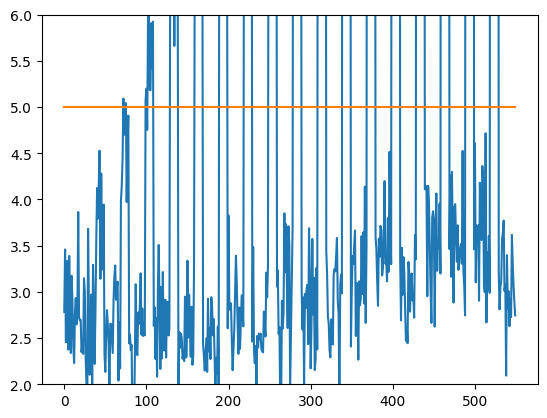

In [10]:
# %matplotlib notebook
%matplotlib inline
plt.plot(data['bg-wt'])
plt.plot(np.linspace(5, 5, 550))
plt.ylim(2, 6)
plt.show()

In [11]:
flag = 0
on_wt = [37, 69, 98]
off_wt = [48, 78, 108]
for i in range(110,len(data.t)):
    if ((flag == 0) and  (data['bg-wt'][i]>=5)):
        flag = 1
        on_wt.append(i)
    if ((flag == 1) and (data['bg-wt'][i]<=5)):
        flag = 0
        off_wt.append(i)
on_wt.append(len(t_wt)-1)
off_wt = list(np.array(off_wt)-1)

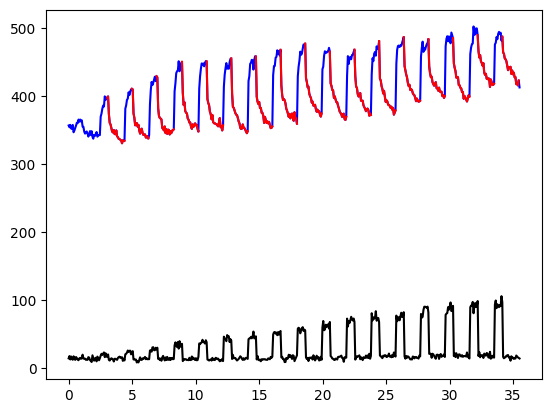

In [12]:
#plt.figure(figsize=(40, 20))
fig, axs = plt.subplots(1,1)
#wt
axs.plot(data.t, data['bg-wt']*5, color='black', label='bg-wt')
axs.plot(data.t, data['wt-2']*5, color='blue', label='wt')

for i in range(len(off_wt)):
    axs.plot(data.t[off_wt[i]:on_wt[i+1]], data['wt-2'][off_wt[i]:on_wt[i+1]]*5,color='red')#, label='mut-FIT')
           
# #mut
# axs[1].plot(data.t, data['bg-mut']*5, color='grey', label='bg-mut')
# axs[1].plot(data.t, data['D220N-1'], color='green', label='D220N')
# for i in range(len(off_D)):
#     axs[1].plot(data.t[off_D[i]:on_D[i+1]], data['D220N-1'][off_D[i]:on_D[i+1]],color='orange')#, label='mut-FIT')
    
#sns.catplot(data=data, x= data.iloc[:, 0], y= data.iloc[:, 1], native_scale=1)
#ax.legend()
plt.show()

In [13]:
# #plt.figure(figsize=(40, 20))
# fig, axs = plt.subplots(6,1)
# #wt-1 - 4
# for i in range(data.shape[1]-5):
#     axs[i].plot(data.t, data['bg-wt']*5, color='black', label='bg-wt')
#     axs[i].plot(data.t, data.iloc[:,i+5], label='wt')

#     for j in range(len(off_wt[0])):
#         axs[i].plot(data.t[off_wt[i][j]:on_wt[i][j]], data.iloc[:,i+5][off_wt[i][j]:on_wt[i][j]],color='red')#, label='mut-FIT')

# #mut 1-2
# for i in range(4, 6):
#     axs[i].plot(data.t, data['bg-mut']*5, color='grey', label='bg-mut')
#     axs[i].plot(data.t, data.iloc[:,i-1], label='D220N')
#     for j in range(len(off_D)):
#         axs[i].plot(data.t[off_D[j]:on_D[j+1]], data.iloc[:,i-1][off_D[j]:on_D[j+1]],color='orange')#, label='mut-FIT')

#     #sns.catplot(data=data, x= data.iloc[:, 0], y= data.iloc[:, 1], native_scale=1)
#     #ax.legend()
# plt.show()

# WT: Curve FIT with Chi2

In [14]:
def chi_sq_norm(n, y):
    return stats.chisquare(n, np.sum(n)/np.sum(y) * y)

[ 9.26094234  0.83165216 49.65496576]
chi2 =  0.547291067656393
[ 4.0718061   0.19161353 52.02500186]
chi2 =  0.3595282987516602
[ 5.99110876  0.12102422 52.40416769]
chi2 =  1.0631687520201691
[5.47458800e+00 3.17658952e-02 5.19381971e+01]
chi2 =  0.7089716351752475
[6.65372011e+00 2.63962149e-02 5.21782462e+01]
chi2 =  0.7040748714583166
[ 6.79942155  0.11717828 51.72012723]
chi2 =  0.6016307676248688
[8.82430872e+00 3.15009829e-02 5.23039098e+01]
chi2 =  1.8150548304551697
[9.69112132e+00 4.12297212e-02 5.40600020e+01]
chi2 =  1.1307670698729493
[ 4.47414946  0.27021061 53.90018982]
chi2 =  0.5405527201683049
[8.28124590e+00 4.28736541e-02 5.53732720e+01]
chi2 =  1.14367069597484
[ 9.79537782  0.07571657 56.83544457]
chi2 =  1.1122815034761342
[ 9.0080335   0.06913497 58.52678473]
chi2 =  1.2956164590854524
[1.11614434e+01 7.43958575e-03 5.86445565e+01]
chi2 =  1.6173124016133635
[1.01918978e+01 2.52376345e-02 5.91612546e+01]
chi2 =  1.2658142738467864
[4.94765000e+00 2.54602329e-03

C:\Users\nsf30\AppData\Local\Temp\ipykernel_3172\80824196.py:2: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x/tau) + c
C:\Users\nsf30\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\nsf30\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


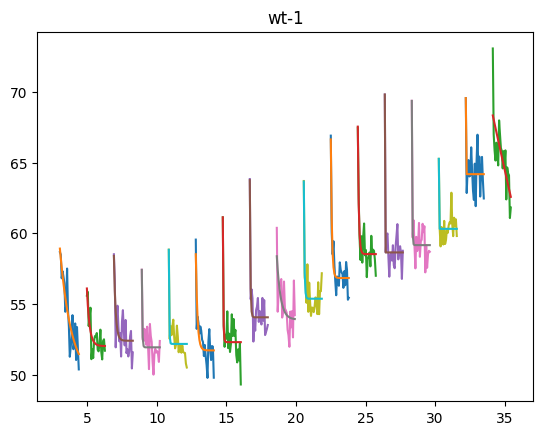

[13.23073795  0.27134836 67.04716405]
chi2 =  0.8039749171389653
[14.24127052  0.22781164 68.54412302]
chi2 =  1.209603069965078
[17.55967059  0.18397104 69.59843536]
chi2 =  1.9077189683919396
[16.97629763  0.18551369 71.25875308]
chi2 =  1.4718968543783262
[16.70577116  0.14560002 71.79551098]
chi2 =  1.460428490194282
[17.86754318  0.18906919 70.7050785 ]
chi2 =  1.871015011064257
[16.03609902  0.21822988 72.05466419]
chi2 =  1.3233471754011517
[17.35983068  0.1727663  74.07316375]
chi2 =  1.697726363946867
[16.99518867  0.27280197 75.30127405]
chi2 =  0.9247830788032592
[15.99123843  0.3687798  73.5289543 ]
chi2 =  0.6312734000503892
[15.35238056  0.27484638 75.61332327]
chi2 =  1.055707699474851
[16.67779684  0.23792774 76.32270872]
chi2 =  1.0407145032630694
[15.80829982  0.28740435 78.92304595]
chi2 =  0.7213051031929825
[13.50846683  0.19818453 81.26864289]
chi2 =  0.9686768016583692
[15.56970833  0.33374794 79.13785735]
chi2 =  0.6039295429382648
[13.84875304  0.48720826 82.46

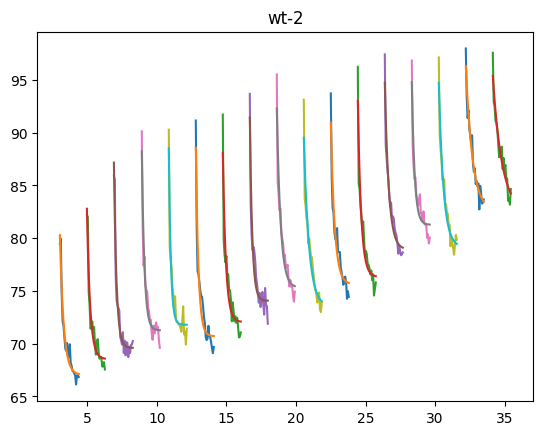

[10.68253545  0.30570863 45.05715595]
chi2 =  0.6953862330464314
[ 9.30683276  0.30793098 45.61658899]
chi2 =  0.7242279689197573
[12.6182924   0.16785216 47.64693437]
chi2 =  1.888293752529801
[10.86453768  0.1777984  48.00213967]
chi2 =  1.414539477768619
[12.55942547  0.1397974  47.33440021]
chi2 =  1.6290353733798137
[11.97667406  0.38704568 45.07408331]
chi2 =  0.8042635773182389
[14.1638498   0.07840438 48.06047991]
chi2 =  2.4251784419630495
[14.08891992  0.18257593 46.95242596]
chi2 =  1.9216415190260225
[12.44585269  0.12276564 48.28587471]
chi2 =  1.4795070265897041
[12.26876062  0.41714506 47.09314278]
chi2 =  0.6060267618251479
[11.76632549  0.262072   47.58848751]
chi2 =  1.3038003523852744
[13.93440329  0.19762857 45.97268796]
chi2 =  1.5657045319657965
[11.51964746  0.5259812  45.80815555]
chi2 =  0.8255449143867307
[ 8.43564519  0.59167442 48.09538808]
chi2 =  0.6933156852255422
[10.77950362  0.10499223 53.46307542]
chi2 =  1.3835431469137711
[14.99592477  0.60042889 52

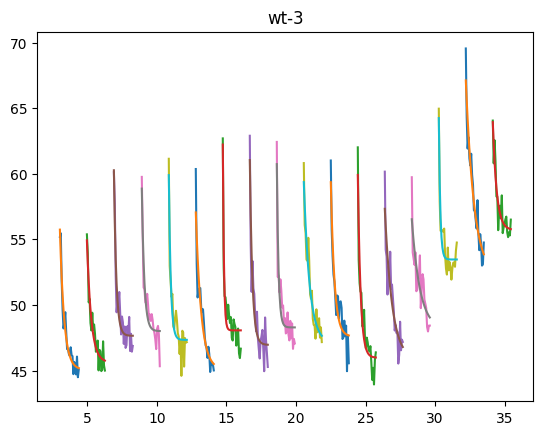

In [15]:
taus_wt = []

for num, col in enumerate(wt_cols):
    t = np.array(data_wt['t'])
    wt = np.array(data_wt[col])
    
#     t_ma = moving_average(t, 4)
#     wt_ma = moving_average(wt, 4)
    
    ts = []
    wts = []
    
    tau_wt = []
    
    for i in range(len(off_wt)):
        ts.append(t[off_wt[i]:on_wt[i+1]])
        wts.append(wt[off_wt[i]:on_wt[i+1]])

    for i in range(len(off_wt)):
        popt, pcov = curve_fit(exp, ts[i]-ts[i][0], wts[i], p0 = [15.99124501,  0.36878762, 73.52887222])
        print(popt)
        plt.plot(ts[i], wts[i])
        plt.plot(ts[i], exp(ts[i]-ts[i][0], *popt))
        tau_wt.append(popt[1])
        
        chi = chi_sq_norm(wts[i][2:], exp(ts[i][2:]-ts[i][2:][0], *popt))[0]
        print('chi2 = ',  chi)
        curve_fit
       
        
    taus_wt.append(tau_wt)

    plt.title(col)
    plt.show()

In [16]:
# # remove tau more than 10min
# taus_wt
# for i in taus_wt:
#     for j in i:
#         if j>=10:
#             i.remove(j)

In [17]:
all_taus_wt = sum(taus_wt, [])
mean_taus_wt = list(map(np.mean, taus_wt))

mean_taus_wt
len(all_taus_wt)

51

In [18]:
len(taus_wt[1])

17

In [19]:
#0.04571 мА -> мВ/мм^2

In [20]:
starts = []
ends = []
for num, col in enumerate(wt_cols):
    start = []
    end = []
    for i in range(len(off_wt)):
        start.append(data[col][on_wt[i]])
        end.append(data[col][off_wt[i]])
    starts.append(start)
    ends.append(end)


In [21]:
starts = np.array(starts)
ends = np.array(ends)

In [22]:
starts[1]

array([68.61 , 76.329, 68.505, 81.455, 82.237, 82.807, 84.479, 86.221,
       85.834, 87.925, 86.033, 86.463, 89.553, 91.702, 94.677, 92.414,
       95.275])

In [23]:
ends[1]

array([79.482, 82.201, 85.92 , 90.121, 90.276, 91.144, 91.713, 93.672,
       95.508, 93.12 , 93.714, 96.24 , 97.413, 96.829, 97.123, 97.972,
       97.565])

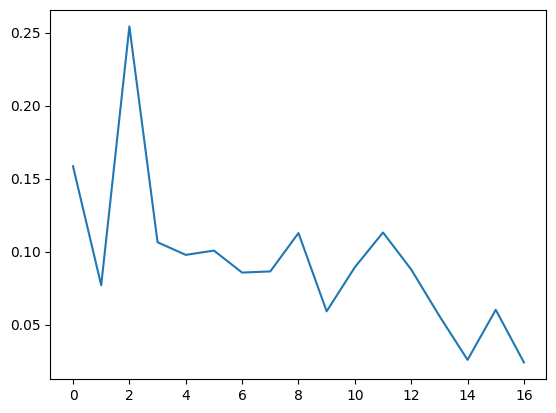

In [24]:
plt.plot((ends[1]-starts[1])/starts[1])

In [25]:
def p_value(p):
    if ((0.05 < p) & (p <= 1)):
        return 'ns'
    elif ((0.01 < p) & (p <= 0.05)):
        return '*'
    elif ((0.001 < p) & (p <= 0.01)):
        return '**'
    elif ((0.0001 < p) & (p <= 0.001)):
        return '***'
    elif (p <= 0.0001):
        return '****'
p_value_vec = np.vectorize(p_value)

In [26]:
res = stats.ttest_ind(a=all_taus_wt, b=all_taus_D)
p = p_value(res[1])

NameError: name 'all_taus_D' is not defined

In [ ]:
y = np.array([np.mean(all_taus_wt), np.mean(all_taus_D)])
x = ['wt', 'D220N']
yerr = [np.std(all_taus_wt), np.std(all_taus_D)]

c = ['gray']
colors = ['green', 'red']
sns.set_palette(c)

fig = plt.figure(figsize = (10, 6), dpi = 300)
ax0 = plt.subplot(1, 1, 1)

for i in range(2):
    ax0.errorbar([x[i]], [y[i]], yerr=[yerr[i]], capsize=5,  fmt = ' ', color = colors[i])
    ax0.errorbar([x[i]], [y[i]], yerr=[0], capsize=5,  fmt = ' ', color = colors[i])

# ax0.errorbar(x, y, yerr=yerr, capsize=5,  fmt = ' ', color = 'red')
# ax0.errorbar(x, y, yerr=np.zeros(2), capsize=5,  fmt = ' ', color = 'red')
# ax0.errorbar()

sns.stripplot(x=['wt']*len(all_taus_wt), y=all_taus_wt, size = 3)
sns.stripplot(x=['D220N']*len(all_taus_D), y=all_taus_D, size = 3)

sns.stripplot(x=['wt']*len(mean_taus_wt), y=mean_taus_wt, color='green')
sns.stripplot(x=['D220N']*len(mean_taus_D), y=mean_taus_D, color = 'red')

plt.ylabel('tau, min', size = 20)
plt.grid(axis='y')
plt.xticks(rotation = 0, size = 20)
plt.ylim(0, 8)

add_stat_annotation(ax0, x=x, y=y+3, perform_stat_test=False, box_pairs=[['wt', 'D220N']],  pvalues=[res[1]])



#draw number of experiments, mean, 
N=[len(all_taus_wt), len(all_taus_D)]
mean=[np.mean(all_taus_wt), np.mean(all_taus_D)]
plt.text(-0.4, -1.5, 'N=', fontsize=20)
plt.text(-0.4, -1, 'mean, min', fontsize=20) #i+1, count[i], 'lyso-NsXeR'
for i in range(0, 2):
    #plt.text(i-0.275, -75, 'N=', fontsize=45) #i+1, count[i], 'lyso-NsXeR'
    plt.text(i, -1.5, N[i], fontsize=15) #i+1, count[i], 'lyso-NsXeR'
    plt.text(i, -1, round(mean[i], 2), fontsize=15) #i+1, count[i], 'lyso-NsXeR'
    #plt.text(i+0.055, -75, '', fontsize=35) #i+1, count[i], 'lyso-NsXeR'
    #exp format '%.1E' % Decimal(mean[i])

plt.show()